In [1]:
import pandas as pd
df = pd.read_csv('income.csv')

In [2]:
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


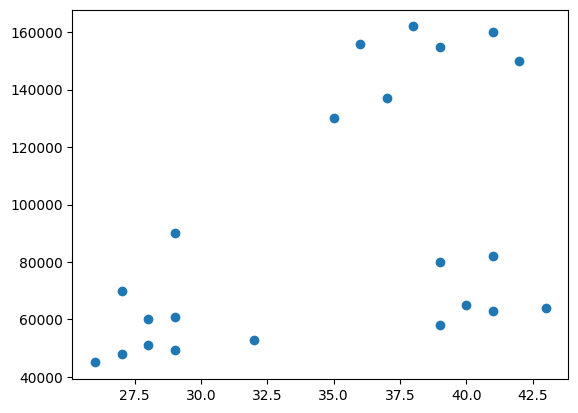

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Income'])

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [21]:
y_pred = model.fit_predict(df[['Age', 'Income']])

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
df['cluster'] = y_pred

In [24]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [25]:
model.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

In [26]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
# df2 = df[df.cluster == 2]
# df3 = df[df.cluster == 3]
# df4 = df[df.cluster == 4]
# df5 = df[df.cluster == 5]

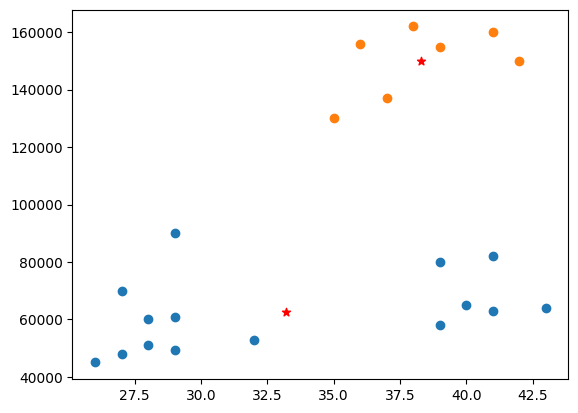

In [27]:
plt.scatter(df0.Age, df0.Income)
plt.scatter(df1.Age, df1.Income)
# plt.scatter(df2.Age, df2.Income)
# plt.scatter(df3.Age, df3.Income)
# plt.scatter(df4.Age, df4.Income)
# plt.scatter(df5.Age, df5.Income)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'r', marker = '*')

In [28]:
sse = []
sse_r = range(1, 10)
for i in sse_r:
    km = KMeans(n_clusters = i)
    km.fit_predict(df[['Age', 'Income']])
    sse.append(km.inertia_)
    
sse

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

[39748148458.545456,
 3318233941.161905,
 1577046058.883117,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 177967003.79523814,
 119633613.78333333,
 92633459.7]

Text(0, 0.5, 'SSE')

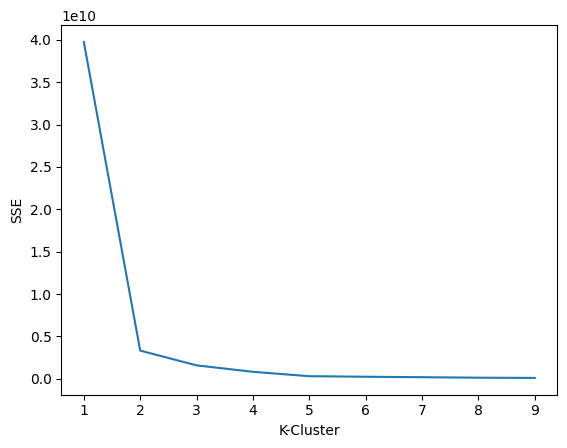

In [29]:
plt.plot(sse_r, sse)
plt.xlabel('K-Cluster')
plt.ylabel('SSE')